In [145]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb

In [147]:
df=pd.read_csv('FPT.csv', sep = ',')
df.head(5)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


<Axes: >

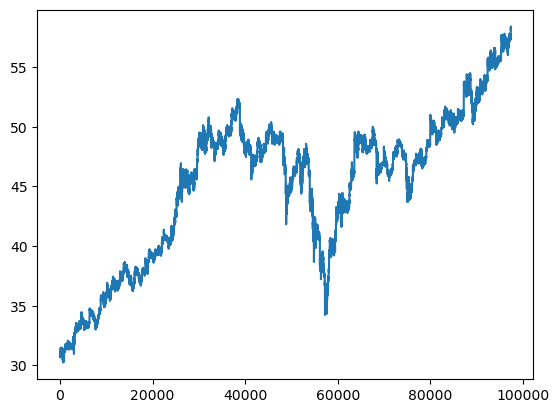

In [148]:
#Show data visually
df['Close'].plot()

In [149]:
# Split the data into training and testing data set
train_set = df.iloc[:int(.99*len(df)), :]
test_set = df.iloc[int(.99*len(df)):, :]

In [150]:
# Define the features and target variable
features = ['Open', 'Volume']
target = 'Close'

In [151]:
#Create and train model 
model = xgb.XGBRegressor()
model.fit(train_set[features], train_set[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [152]:
# Make and show the predictions on the test data
predictions = model.predict(test_set[features])
print('Model Predictions')
print(predictions)

Model Predictions
[57.36127  57.35322  57.31463  57.426807 57.369278 57.19509  57.314747
 57.197807 57.415604 57.22089  57.381027 57.192352 57.325844 57.39604
 57.33815  57.378872 57.468857 57.2444   57.213528 57.1988   57.25021
 57.186916 57.39604  57.300766 57.381027 57.325844 57.212193 57.345665
 57.330833 57.40024  57.407036 57.381977 57.232628 57.23021  57.32581
 57.380955 57.3381   57.325844 57.334507 57.468857 57.121014 57.210167
 57.332325 57.337326 57.313583 57.405823 57.37285  57.220036 57.398033
 57.229057 57.454754 57.380955 57.213993 57.349483 57.402767 57.347683
 57.359272 57.345585 57.36671  57.371593 57.364174 57.337708 57.21458
 57.3458   57.39657  57.42604  57.345585 57.373962 57.377796 57.359802
 57.335762 57.35948  57.3457   57.362015 57.292595 57.287685 57.20529
 57.221104 57.246284 57.25913  56.97213  56.845875 56.86423  56.72746
 56.65523  56.833687 56.883667 56.9397   56.77862  56.73596  56.85702
 56.79981  56.742813 56.829323 56.84513  56.887253 56.856342 56.87

In [153]:
# show the actual values
print('Actual Values: ')
print(test_set[target])

Actual Values: 
96431    57.4
96432    57.4
96433    57.4
96434    57.4
96435    57.2
         ... 
97401    58.2
97402    58.2
97403    58.2
97404    58.1
97405    58.1
Name: Close, Length: 975, dtype: float64


#show the model accuracy

In [154]:
accuracy = model.score(test_set[features], test_set[target])
print('Accuracy: ')
print(accuracy)

Accuracy: 
0.806603925323556


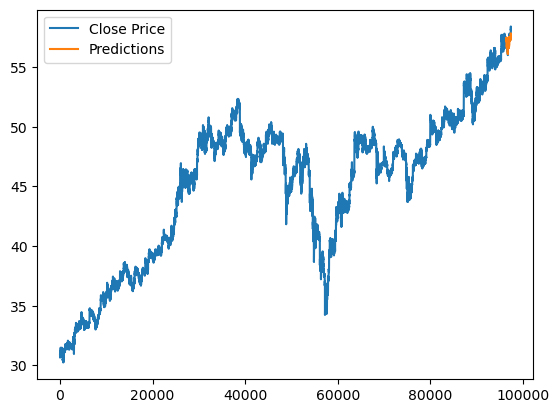

In [155]:
#Plot the predictions and the close price
plt.plot(df['Close'], label = 'Close Price')
plt.plot(test_set[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()